In [1]:
'''
1.download the daily 2m-temperature data at ThaiBinhstation: T2m_THAIBINH.txt from the Moodle site: 
https://moodle.usth.edu.vn/mod/resource/view.php?id=2176

2.Write a python program to read the daily temperature data at ThaiBinhstation 
3.Estimate monthly values for each year
4.Estimate statistics for each month (mean, median, variance, standard deviation, 10thpercentile, 90thpercentile)
5.Plot monthly-mean climatology at ThaiBinhstation
6.Estimate at least 3 extreme index according to the definition given at http://etccdi.pacificclimate.org/list_27_indices.shtml


'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("temp.txt")

In [21]:
df = pd.DataFrame(data, columns = ['Days', 'January', 'February', 'March', 'April', 'May', 'June' 
                                   , 'July', 'August', 'September', 'October', 'November', 'December'])

# -99.0 values is all outliers -> turn to NaN values
df.replace(-99.0, np.NaN, inplace=True)

# handling with outliers with forward fill:
df = df.fillna(method="ffill")

In [22]:
number_of_years = data.shape[0]/31  # 52 years

years = [x for x in range(1961, 2013)]
years_str = list(map(str, years))

In [23]:
#years_str
for i in range(0, 52):
    years[i] = df.iloc[(0 + 31*i):(31 + i*31), :].set_index("Days")
    years[i].name = years_str[i]
    
#year[x].name to find out which year is this table
#For example: year[0] -> 1961, year[1] -> 1962, ... year[51] -> 2013

In [24]:
# Analysis for year 1961:
print(years[0].name) # -> should return 1961 here

# Mean
years[0].mean()

1961


January      15.632258
February     16.519355
March        19.819355
April        24.216129
May          26.767742
June         27.812903
July         29.406452
August       28.316129
September    26.909677
October      25.280645
November     22.287097
December     19.090323
dtype: float64

In [25]:
# Median
years[0].median()

January      15.8
February     17.0
March        19.8
April        24.2
May          26.7
June         27.9
July         29.4
August       28.6
September    26.8
October      25.1
November     22.8
December     19.9
dtype: float64

In [26]:
# Variance
years[0].var()

January       8.036258
February      5.414946
March         4.272946
April         3.655398
May           2.475591
June          2.371828
July          1.043957
August        2.969398
September     2.126903
October       1.471613
November      4.635161
December     11.276903
dtype: float64

In [27]:
# Standard Deviation
years[0].std()

January      2.834829
February     2.327004
March        2.067111
April        1.911909
May          1.573401
June         1.540074
July         1.021742
August       1.723194
September    1.458391
October      1.213101
November     2.152942
December     3.358110
dtype: float64

In [28]:
# 10thpercentile
years[0].quantile(.1)

January      11.9
February     12.8
March        17.7
April        22.0
May          24.8
June         26.0
July         28.2
August       26.0
September    25.1
October      23.9
November     18.9
December     15.2
Name: 0.1, dtype: float64

In [54]:
# 90thpercentile
years[0].quantile(.9)

January      19.0
February     18.2
March        23.0
April        27.0
May          28.4
June         29.7
July         30.8
August       30.4
September    29.0
October      26.7
November     24.4
December     23.0
Name: 0.9, dtype: float64

In [72]:
# OR if you want to get quick INSIGHT
years[0].describe()

,January,February,March,April,May,June,July,August,September,October,November,December
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,15.632258,16.519355,19.819355,24.216129,26.767742,27.812903,29.406452,28.316129,26.909677,25.280645,22.287097,19.090323
std,2.834829,2.327004,2.067111,1.911909,1.573401,1.540074,1.021742,1.723194,1.458391,1.213101,2.152942,3.358110
min,11.000000,11.500000,16.100000,21.000000,23.200000,25.000000,27.600000,24.800000,24.700000,22.200000,18.200000,12.100000
25%,13.100000,15.750000,18.200000,22.650000,26.050000,26.800000,28.700000,27.100000,25.800000,24.750000,20.550000,16.450000
50%,15.800000,17.000000,19.800000,24.200000,26.700000,27.900000,29.400000,28.600000,26.800000,25.100000,22.800000,19.900000
75%,18.050000,17.900000,20.650000,25.450000,27.800000,28.600000,29.900000,29.300000,27.950000,25.950000,24.050000,22.100000
max,20.200000,21.000000,24.400000,27.800000,30.300000,31.200000,32.000000,31.200000,29.400000,27.300000,25.600000,23.700000


In [69]:
# 5.Plot monthly-mean climatology at ThaiBinhstation
month_mean = []
for o in range(0,52):
    month_mean = np.append(month_mean, years[o].mean().values)
print(month_mean.size)

624


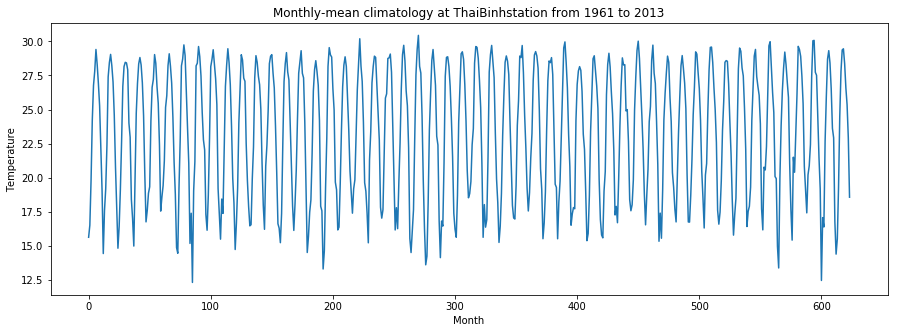

In [74]:
plt.figure(figsize = (15, 5))
plt.plot(month_mean)
plt.title("Monthly-mean climatology at ThaiBinhstation from 1961 to 2013")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()